#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms.v2 as T

In [ ]:
transform = T.Compose(   # преобразования для датасета
    [
      T.ToTensor(),
      T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),   # нормализация данных
    ]
)

dataset = CIFAR10(
    root="./tmp",
    train=True,
    download=True,
    transform=transform
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


100%|██████████| 170498071/170498071 [00:02<00:00, 73718049.90it/s]


Extracting ./tmp/cifar-10-python.tar.gz to ./tmp


In [ ]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./tmp
    Split: Train
    StandardTransform
Transform: Compose(
                 ToTensor()
                 Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], inplace=False)
           )

In [ ]:
x = dataset[0][0]
x

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

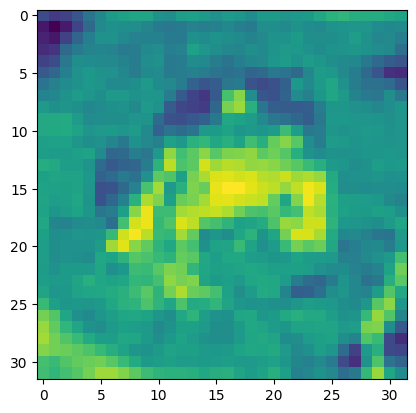

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(dataset[0][0][0])

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
x.shape # channels x h x w

torch.Size([3, 32, 32])

In [ ]:
conv = nn.Conv2d(   # двумерная свертка
    in_channels=3,   # количество каналов во входном изображении
    out_channels=5,   # – количество каналов, создаваемых сверткой
    kernel_size=3)  # размер ядра свертки

In [ ]:
b = x.unsqueeze(0)   # Возвращает новый тензор с размером, равным единице, вставленный в указанную позицию.
b.shape # batch x channels x h x w

torch.Size([1, 3, 32, 32])

In [ ]:
o = conv(b)
o.shape

torch.Size([1, 5, 30, 30])

In [ ]:
pool = nn.MaxPool2d(kernel_size=2)   # размер окна для вычисления максимума

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc = nn.Linear(in_features=12*6*6, out_features=10)  # полносвязный слой

  def forward(self, X):
    # feature extractors
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out)   # b x 12 x 6 x 6

    # classifier
    out = th.flatten(out, start_dim=1) # b x 12*6*6   преобразование размерности с размерности start+dim
    out = self.fc(out)
    return out

In [ ]:
net = ConvNet()
o = net(b)
o.shape

torch.Size([1, 10])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

- [ ] Проверено на семинаре

In [ ]:
import torch as th
from torchvision import datasets, transforms
import torchvision.transforms.v2 as T

In [ ]:
from zipfile import ZipFile

zipfile = ZipFile("/content/drive/MyDrive/пм21_финашка/3 курс/Deep learning/04_cnn/cat_breeds_4.zip", "r")
zipfile.extractall()
zipfile.printdir()

File Name                                             Modified             Size
cat_breeds_4/                                  2023-10-15 22:08:16            0
cat_breeds_4/American Shorthair/               2023-10-15 22:08:16            0
cat_breeds_4/American Shorthair/41327462_9989.jpg 2023-10-15 22:08:14        11834
cat_breeds_4/American Shorthair/41336596_9982.jpg 2023-10-15 22:08:14        10237
cat_breeds_4/American Shorthair/41339518_9980.jpg 2023-10-15 22:08:14        13557
cat_breeds_4/American Shorthair/41353269_9969.jpg 2023-10-15 22:08:14        11577
cat_breeds_4/American Shorthair/41354026_9966.jpg 2023-10-15 22:08:14        13298
cat_breeds_4/American Shorthair/41383875_9939.jpg 2023-10-15 22:08:14        16125
cat_breeds_4/American Shorthair/41393674_9936.jpg 2023-10-15 22:08:14        15485
cat_breeds_4/American Shorthair/41398805_9934.jpg 2023-10-15 22:08:14        11474
cat_breeds_4/American Shorthair/41413039_9909.jpg 2023-10-15 22:08:16        10717
cat_breeds_4/

In [ ]:
ds = datasets.ImageFolder("cat_breeds_4") #, transform=transform)
# ds = datasets.ImageFolder("cat_breeds_4") #, transform=transform)

cat_breeds_4/Persian/31741988_5239.jpg         2023-10-15 22:08:18        10512
cat_breeds_4/Persian/31765563_5228.jpg         2023-10-15 22:08:18        19651
cat_breeds_4/Persian/31774053_5221.jpg         2023-10-15 22:08:18        17842
cat_breeds_4/Persian/31792905_5212.jpg         2023-10-15 22:08:18        17283
cat_breeds_4/Persian/31821351_5208.jpg         2023-10-15 22:08:18        11997
cat_breeds_4/Persian/31850706_5188.jpg         2023-10-15 22:08:18        25960
cat_breeds_4/Persian/31858483_5182.jpg         2023-10-15 22:08:18        18824
cat_breeds_4/Persian/31863910_5180.jpg         2023-10-15 22:08:18        11276
cat_breeds_4/Persian/31867210_5178.jpg         2023-10-15 22:08:18        10102
cat_breeds_4/Persian/31899662_5167.jpg         2023-10-15 22:08:18         9419
cat_breeds_4/Persian/31911488_5163.jpg         2023-10-15 22:08:16        13839
cat_breeds_4/Persian/31960360_5150.jpg         2023-10-15 22:08:18        17348
cat_breeds_4/Persian/31972520_5146.jpg  

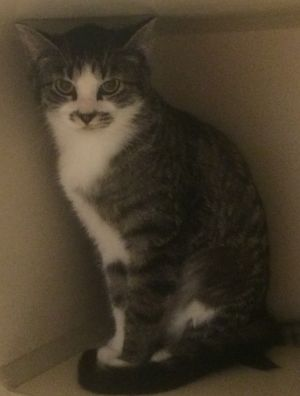

In [ ]:
ds[0][0]

In [ ]:
transform1 = T.Compose(
        [
      T.ToTensor(),
      T.Resize((300,300)),
      # T.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),   # нормализация данных
    ]
); transform1

Compose(
      ToTensor()
      Resize(size=[300, 300], interpolation=InterpolationMode.BILINEAR, antialias=warn)
)

In [ ]:
ds = datasets.ImageFolder("cat_breeds_4", transform=transform1)

In [ ]:
ds[0][0].shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 300, 300])

In [ ]:
ds[0][0][0], ds[1][0][0], ds[2][0][0]    # rgb

(tensor([[0.5327, 0.5327, 0.5360,  ..., 0.4784, 0.4712, 0.4712],
         [0.5294, 0.5275, 0.5256,  ..., 0.4728, 0.4726, 0.4707],
         [0.5294, 0.5255, 0.5184,  ..., 0.4573, 0.4612, 0.4573],
         ...,
         [0.5365, 0.5325, 0.5325,  ..., 0.3592, 0.3553, 0.3553],
         [0.5354, 0.5335, 0.5335,  ..., 0.3686, 0.3647, 0.3647],
         [0.5340, 0.5340, 0.5373,  ..., 0.3620, 0.3581, 0.3581]]),
 tensor([[0.6588, 0.6588, 0.6706,  ..., 0.5176, 0.5098, 0.5059],
         [0.6608, 0.6627, 0.6745,  ..., 0.5176, 0.5117, 0.5059],
         [0.6640, 0.6679, 0.6797,  ..., 0.5201, 0.5156, 0.5077],
         ...,
         [0.5889, 0.6000, 0.6118,  ..., 0.3994, 0.3876, 0.3837],
         [0.5882, 0.6000, 0.6118,  ..., 0.4000, 0.3882, 0.3863],
         [0.5882, 0.6000, 0.6118,  ..., 0.4000, 0.3882, 0.3882]]),
 tensor([[0.9961, 0.9961, 0.9961,  ..., 0.4855, 0.4737, 0.4654],
         [0.9961, 0.9961, 0.9961,  ..., 0.4747, 0.4617, 0.4512],
         [0.9961, 0.9961, 0.9961,  ..., 0.4543, 0.4407, 0.

In [ ]:
len(ds)

4000

In [ ]:
# нормализация данных
# red
m_r = []
s_r = []
for i in range(len(ds)):
    m_r.append(th.mean(ds[i][0][0]).item())   # среднее значение каждого изображения
    s_r.append(th.std(ds[i][0][0]).item())   # среднее отклонение каждого изображения

mean_red = th.mean(th.tensor(m_r))
std_red = th.mean(th.tensor(s_r))   # среднее значение стандартного отклонения

In [ ]:
# green

m_g = []
s_g = []
for i in range(len(ds)):
    m_g.append(th.mean(ds[i][0][1]).item())
    s_g.append(th.std(ds[i][0][1]).item())

mean_green = th.mean(th.tensor(m_g))
std_green = th.mean(th.tensor(s_g))

In [ ]:
# blue
m_b = []
s_b = []
for i in range(len(ds)):
    m_b.append(th.mean(ds[i][0][2]).item())
    s_b.append(th.std(ds[i][0][2]).item())

mean_blue = th.mean(th.tensor(m_b))
std_blue = th.mean(th.tensor(s_b))

In [ ]:
mean = (mean_red.item(), mean_green.item(), mean_blue.item())
std = (std_red.item(), std_green.item(), std_blue.item())
mean, std

((0.49993181228637695, 0.4512978494167328, 0.4065292179584503),
 (0.2326388955116272, 0.2275814414024353, 0.2230532169342041))

In [ ]:
transform = T.Compose(
        [
      T.ToTensor(),
      T.Resize((300,300)),
      T.Normalize(mean=mean, std= std),   # нормализация данных
    ]
); transform

Compose(
      ToTensor()
      Resize(size=[300, 300], interpolation=InterpolationMode.BILINEAR, antialias=warn)
      Normalize(mean=[0.49993181228637695, 0.4512978494167328, 0.4065292179584503], std=[0.2326388955116272, 0.2275814414024353, 0.2230532169342041], inplace=False)
)

In [ ]:
dataset = datasets.ImageFolder("cat_breeds_4", transform=transform)

In [ ]:
len(dataset)   # кол-во картинок в датасете

4000

In [ ]:
# размер одной картинки
dataset[0][0].shape

torch.Size([3, 300, 300])

In [ ]:
dataset.classes

['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']

In [ ]:
len(dataset.classes)   # кол-во классов

4

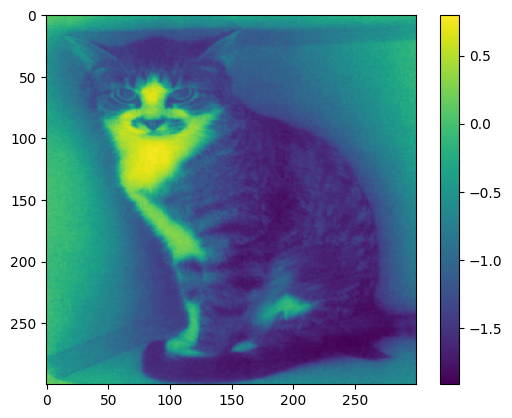

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(dataset[0][0][0])
plt.colorbar()

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split


train, test = random_split(
    dataset,
     [0.8, 0.2]
)

In [ ]:
len(train)

3200

<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [ ]:
train[0][0].shape

torch.Size([3, 300, 300])

In [ ]:
from torch.utils.data import DataLoader
import torch.nn as nn

train_loader = DataLoader(train, batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=32, shuffle=True)

In [ ]:
# Переносим данные на GPU, если доступен
device = th.device("cuda" if th.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features= 3*300*300, out_features= 5),
    nn.ReLU(),
    nn.Linear(in_features = 5, out_features = len(dataset.classes))
) .to(device)

In [ ]:
for x, y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([32, 3, 300, 300])
torch.Size([32])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
import torch.optim as optim

n_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

losses = []
accuracy_train, accuracy_test = [], []

for epoch in range(n_epochs):

  acc_train = 0
  acc_test = 0

  for x_train, y_train in train_loader:

    out = model(x_train.to(device).reshape(-1, 270000))    # вероятность принадлежности к каждому классу
    y_pred_train = th.argmax(out, dim=1)   #  предсказанный класс
    acc_train += th.sum(y_pred_train == y_train.to(device)).item()

    loss = criterion(out, y_train.to(device))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  losses.append(loss)
  print(f"{epoch+1}/{n_epochs} {loss.item()=}")

  for x_test, y_test in test_loader:
    out = model(x_test.to(device).reshape(-1, 270000))
    y_pred_test = th.argmax(out, dim = 1)

    acc_test += th.sum(y_pred_test == y_test.to(device)).item()

  accuracy_train.append(acc_train/len(train))
  accuracy_test.append(acc_test/len(test))

1/5 loss.item()=1.396160364151001
2/5 loss.item()=1.4308702945709229
3/5 loss.item()=1.2263290882110596
4/5 loss.item()=1.3087599277496338
5/5 loss.item()=1.2503314018249512


Text(0, 0.5, 'Значение Loss')

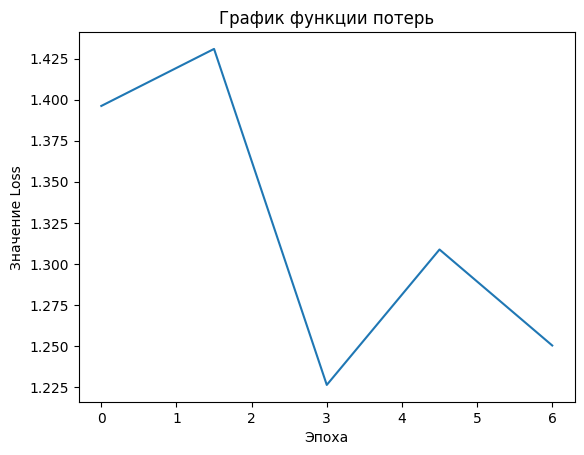

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# график потерь

plt.plot(th.linspace(0, n_epochs+1, n_epochs), th.tensor(losses))
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Значение Loss')

In [ ]:
accuracy_train, accuracy_test

([0.301875, 0.35625, 0.405625, 0.4246875, 0.453125],
 [0.3175, 0.38375, 0.39625, 0.38375, 0.4125])

Text(0, 0.5, 'Значение accuracy')

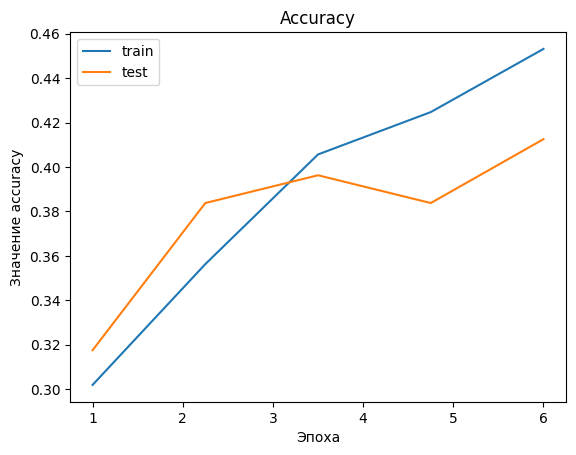

In [ ]:
plt.plot(th.linspace(1, n_epochs+1, n_epochs), accuracy_train)
plt.plot(th.linspace(1, n_epochs+1, n_epochs), accuracy_test)
plt.title('Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('Эпоха')
plt.ylabel('Значение accuracy')

In [ ]:
# итоговое значение метрики accuracy на обучающем и тестовом множестве.

accuracy_train, accuracy_test = [], []

acc_train = 0
acc_test = 0
for x_train, y_train in train_loader:

  out = model(x_train.to(device).reshape(-1, 270000))    # вероятность принадлежности к каждому классу
  y_pred_train = th.argmax(out, dim=1)   #  предсказанный класс
  acc_train += th.sum(y_pred_train == y_train.to(device)).item()


for x_test, y_test in test_loader:
  out = model(x_test.to(device).reshape(-1, 270000))
  y_pred_test = th.argmax(out, dim = 1)
  acc_test += th.sum(y_pred_test == y_test.to(device)).item()


acc_train/len(train), (acc_test/len(test))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(0.4946875, 0.4125)

In [ ]:
# for i in model.parameters():
#   print(i, i.numel())

In [ ]:
# общее число параметров

total_parameters = sum(p.numel() for p in model.parameters())
total_parameters
#  numel -- подсчитывает число элементов

1350029

<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

In [ ]:
import numpy as np
from torch.utils.data  import SubsetRandomSampler

In [ ]:
def show_examples(model, dataset, k ):
    index = np.random.choice(len(dataset), k)  # случайный выбор изображений
    classes = {i:j for i, j in enumerate(dataset.classes)}
    dataset_loader = DataLoader(dataset, batch_size=k, sampler=SubsetRandomSampler(index))   # рандомные 6 изображений
    x_true, y_true = next(iter(dataset_loader))
    out = model(x_true.to(device).reshape(-1, 3*300*300))
    y_pred = th.argmax(out, dim=1)

    fig, ax = plt.subplots(nrows=1, ncols=k, figsize=(20, 10))
    for i in range(k):
        ax[i].imshow(x_true[i].permute(1,2,0).cpu().numpy())
        ax[i].set_title(f'class True: {classes[y_true[i].item()]},\n class Pred: {classes[y_pred[i].item()]}')

In [ ]:
model = nn.Sequential(
    nn.Linear(3*300*300, 28),
    nn.ReLU(),
    nn.Linear(28, len(dataset.classes))
).to(device)

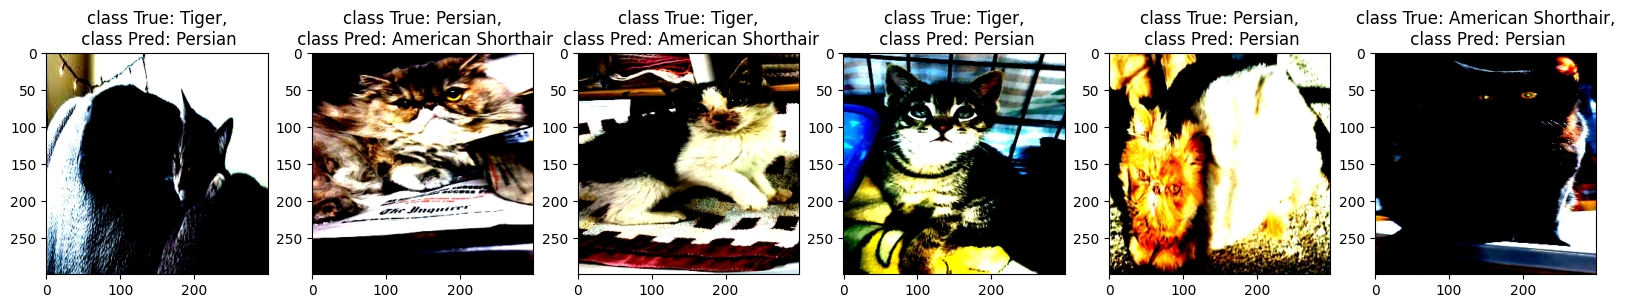

In [ ]:
show_examples(model, dataset, k = 6)

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

- [ ] Проверено на семинаре

In [ ]:
dataset = datasets.ImageFolder("cat_breeds_4", transform=transform)

In [ ]:
train, test = random_split(
    dataset,
    [0.8, 0.2]
)

In [ ]:
train_loader = DataLoader(train, batch_size = 64, shuffle = True)
test_loader = DataLoader(test, batch_size = 32, shuffle= True)
next(iter(train_loader))[0].shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([64, 3, 300, 300])

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels= 3, out_channels=16, kernel_size=3, padding=1 )  # кол-во входных каналов 3 (rgb), ядро свертки 3x3, padding = 1 -- соранение размерности
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=12, kernel_size=3, padding = 1)
    self.pool2 = nn.MaxPool2d(kernel_size= 3)

    self.fc = nn.Linear(in_features=12*50*50, out_features=len(dataset.classes))  # полносвязный слой

  def forward(self, X):
    # feature extractors
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out)   # b x 12 x 6 x 6

    # classifier
    out = th.flatten(out, start_dim=1) # b x 12*6*6   преобразование размерности с размерности start+dim
    out = self.fc(out)
    return out

In [ ]:
model = ConvNet().to(device)

In [ ]:
import torch.optim as optim

n_epochs = 3
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

losses = []
accuracy_train, accuracy_test = [], []

for epoch in range(n_epochs):

  acc_train = 0
  acc_test = 0

  for x_train, y_train in train_loader:

    out = model(x_train.to(device))    # вероятность принадлежности к каждому классу
    y_pred_train = th.argmax(out, dim=1)   #  предсказанный класс
    acc_train += th.sum(y_pred_train == y_train.to(device)).item()

    loss = criterion(out, y_train.to(device))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  losses.append(loss)
  print(f"{epoch+1}/{n_epochs} {loss.item()=}")

  for x_test, y_test in test_loader:
    out = model(x_test.to(device))
    y_pred_test = th.argmax(out, dim = 1)

    acc_test += th.sum(y_pred_test == y_test.to(device)).item()

  accuracy_train.append(acc_train/len(train))
  accuracy_test.append(acc_test/len(test))

1/3 loss.item()=1.3139041662216187
2/3 loss.item()=1.2503019571304321
3/3 loss.item()=1.1154437065124512


Text(0, 0.5, 'Значение Loss')

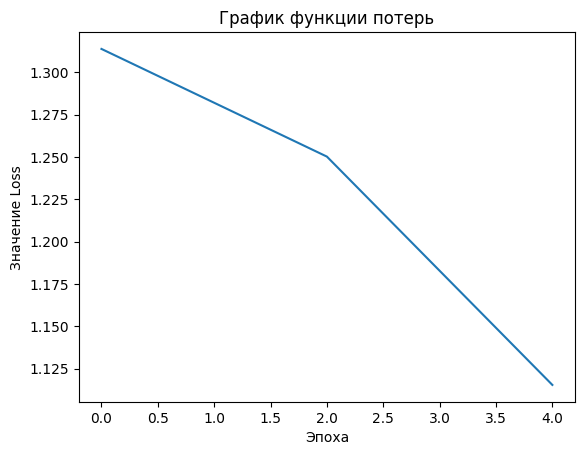

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# график потерь

plt.plot(th.linspace(0, n_epochs+1, n_epochs), th.tensor(losses))
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Значение Loss')

In [ ]:
accuracy_train, accuracy_test

([0.4640625, 0.4790625, 0.52], [0.45625, 0.435, 0.47375])

Text(0, 0.5, 'Значение accuracy')

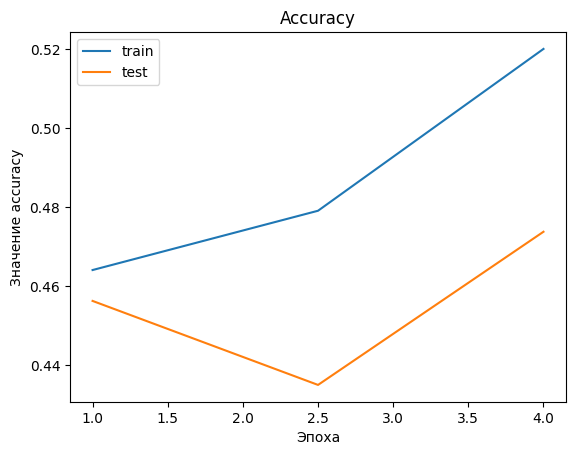

In [ ]:
plt.plot(th.linspace(1, n_epochs+1, n_epochs), accuracy_train)
plt.plot(th.linspace(1, n_epochs+1, n_epochs), accuracy_test)
plt.title('Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('Эпоха')
plt.ylabel('Значение accuracy')

In [ ]:
# итоговое значение метрики accuracy на обучающем и тестовом множестве.

accuracy_train, accuracy_test = [], []

acc_train = 0
acc_test = 0
for x_train, y_train in train_loader:

  out = model(x_train.to(device))    # вероятность принадлежности к каждому классу
  y_pred_train = th.argmax(out, dim=1)   #  предсказанный класс
  acc_train += th.sum(y_pred_train == y_train.to(device)).item()


for x_test, y_test in test_loader:
  out = model(x_test.to(device))
  y_pred_test = th.argmax(out, dim = 1)
  acc_test += th.sum(y_pred_test == y_test.to(device)).item()


acc_train/len(train), (acc_test/len(test))

(0.5484375, 0.47375)

In [ ]:
# общее число параметров

total_parameters = sum(p.numel() for p in model.parameters())
total_parameters
#  numel -- подсчитывает число элементов

122192

In [ ]:
def show_examples(model, dataset, k ):
    index = np.random.choice(len(dataset), k)  # случайный выбор изображений
    classes = {i:j for i, j in enumerate(dataset.classes)}
    dataset_loader = DataLoader(dataset, batch_size=k, sampler=SubsetRandomSampler(index))   # рандомные 6 изображений
    x_true, y_true = next(iter(dataset_loader))
    out = model(x_true.to(device))
    y_pred = th.argmax(out, dim=1)

    fig, ax = plt.subplots(nrows=1, ncols=k, figsize=(20, 10))
    for i in range(k):
        ax[i].imshow(x_true[i].permute(1,2,0).cpu().numpy())
        ax[i].set_title(f'class True: {classes[y_true[i].item()]},\n class Pred: {classes[y_pred[i].item()]}')

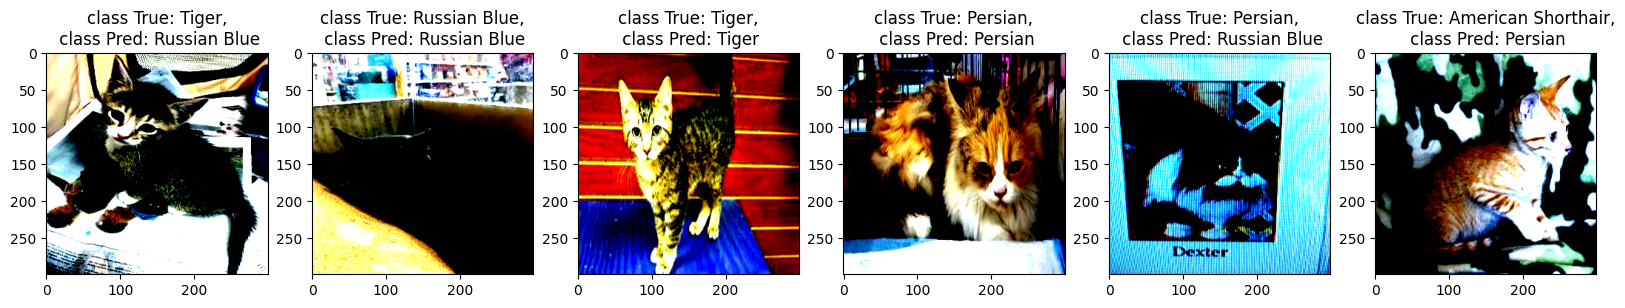

In [ ]:
show_examples(model, dataset, k = 6)

<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

In [ ]:
# выбор изображения

x,y = train[np.random.choice(np.random.choice(len(train), 1))]
x.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 300, 300])

In [ ]:
x = x.unsqueeze(0)
x.shape

torch.Size([1, 3, 300, 300])

In [ ]:
# пропуск через 1 сверточный слой
conv_out = model.conv1(x.to(device))
conv_out.shape

torch.Size([1, 16, 300, 300])

In [ ]:
conv_out = conv_out.squeeze().cpu().detach().numpy()   # squeeze - удаляет все размерности == 1
conv_out.shape

(16, 300, 300)

In [ ]:
# conv_out[15]

In [ ]:
for i in range(4):
    for j in range(4):
        print(i*4+j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


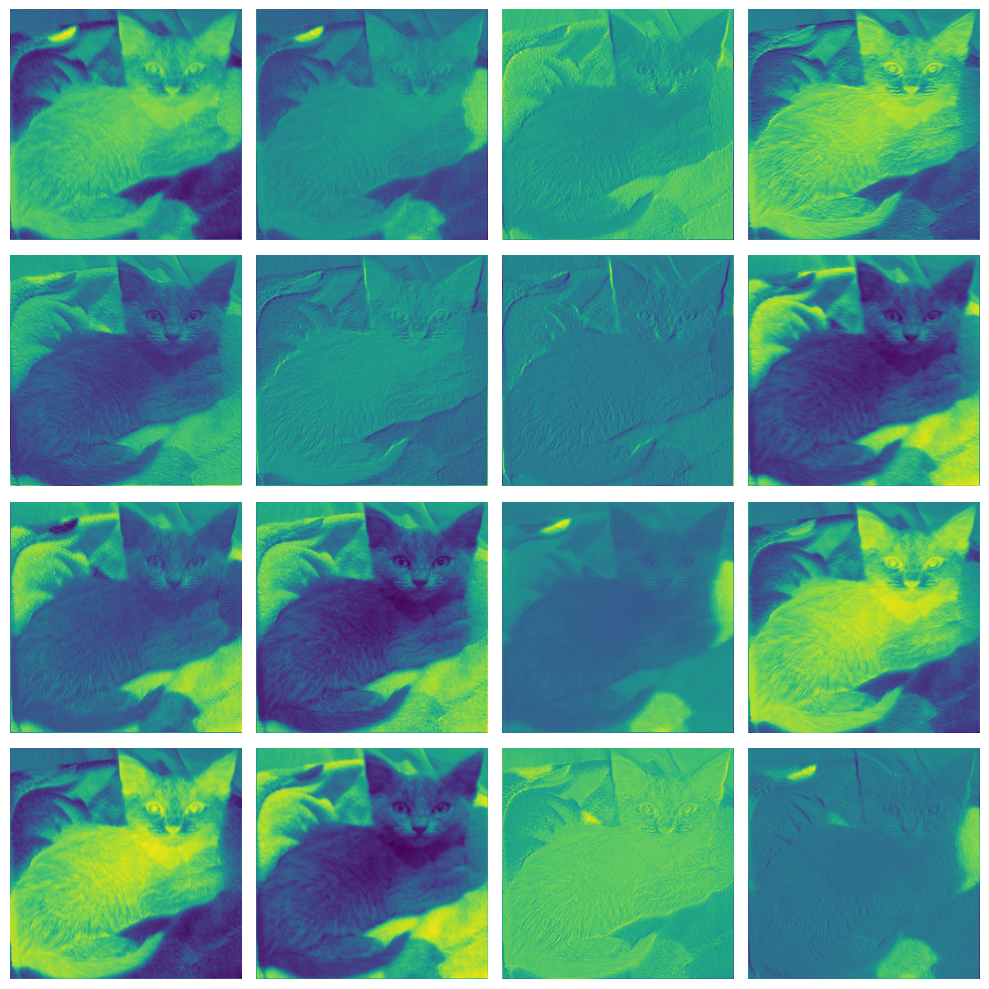

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        axs[i][j].imshow(conv_out[i*4+j])
        axs[i][j].axis('off')

plt.tight_layout()
plt.show()

## Обратная связь
- [x] Хочу получить обратную связь по решению